In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
import missingno as msno
sns.set_style('darkgrid')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [4]:
path = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/icr-identify-age-related-conditions'
df_greeks = pd.read_csv(path+'/greeks.csv')
df_sample_sub = pd.read_csv(path+'/sample_submission.csv')
df_test = pd.read_csv(path+'/test.csv')
df_train = pd.read_csv(path+'/train.csv')

In [5]:
df_greeks.columns = df_greeks.columns.str.lower().str.replace(' ', '')
df_sample_sub.columns = df_sample_sub.columns.str.lower().str.replace(' ', '')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '')
df_train.columns = df_train.columns.str.lower().str.replace(' ', '')

In [6]:
merge_df = df_train.merge(df_greeks, how='left', left_on='id', right_on='id')

In [96]:
df_train.head()

,id,ab,af,ah,am,ar,ax,ay,az,bc,bd,bn,bp,bq,br,bz,cb,cc,cd,cf,ch,cl,cr,cs,cu,cw,da,de,df,dh,di,dl,dn,du,dv,dy,eb,ee,eg,eh,ej,el,ep,eu,fc,fd,fe,fi,fl,fr,fs,gb,ge,gf,gh,gi,gl,class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


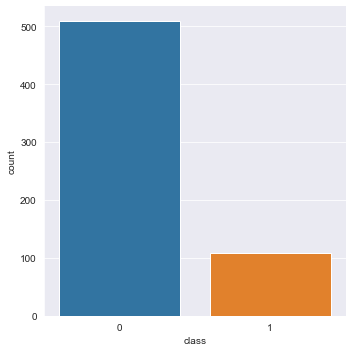

In [122]:
# Need to figure out class imbalance
sns.catplot(df_train, x='class', kind='count')

In [126]:
df_train.groupby('class')['class'].count()

class
0    509
1    108
Name: class, dtype: int64

<AxesSubplot: >

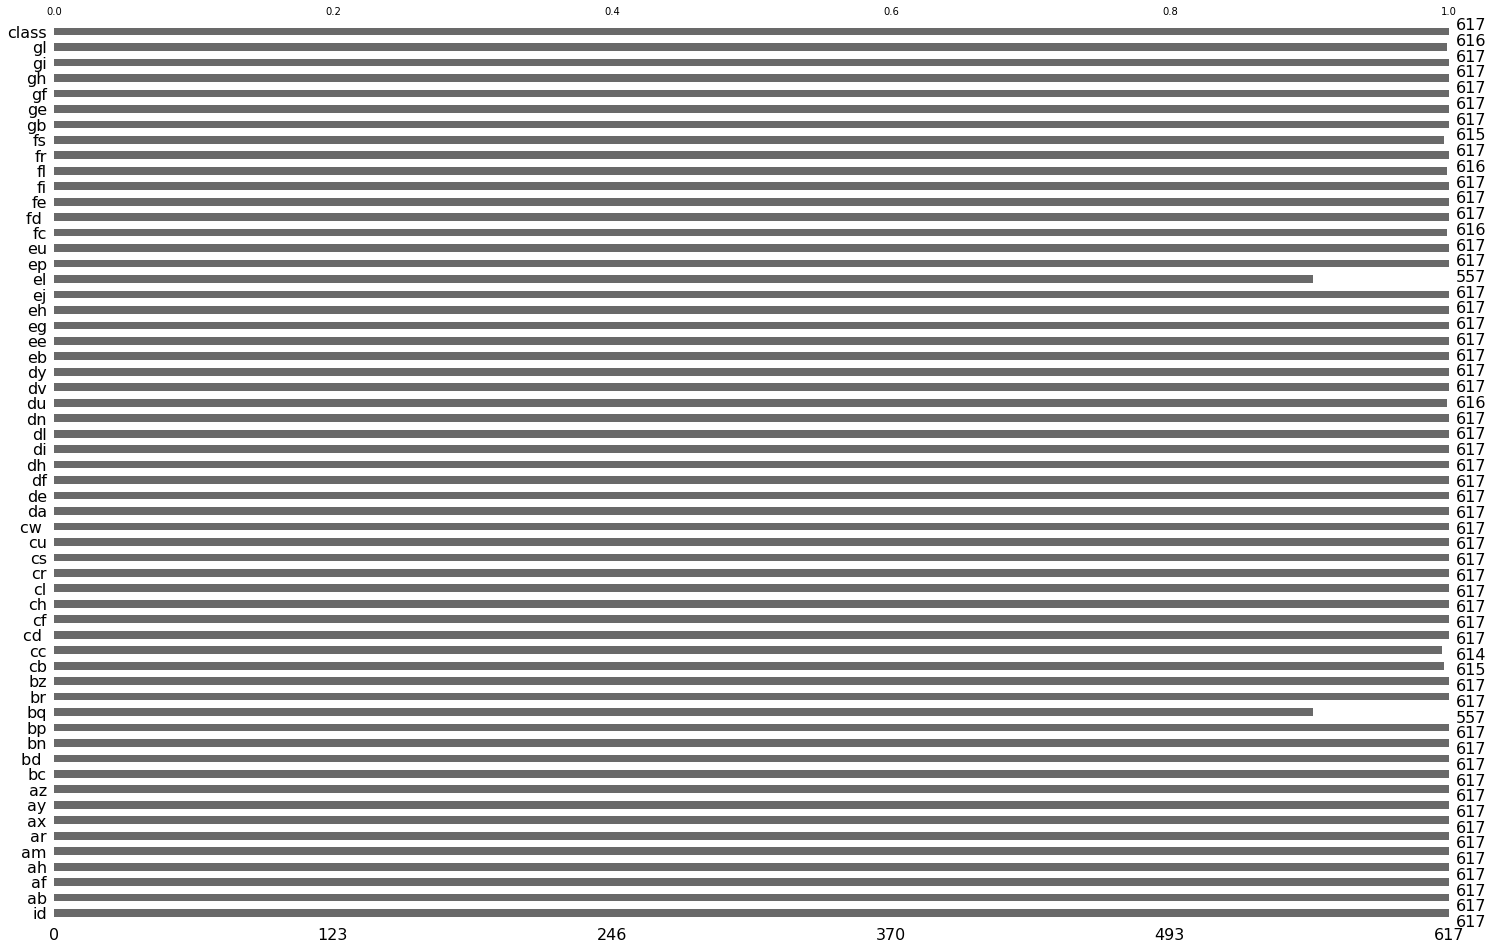

In [46]:
msno.bar(df_train)

In [47]:
df_greeks.head()

,id,alpha,beta,gamma,delta,epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [52]:
df_greeks.delta.nunique()

4

In [74]:
# Which pattern related with outcome

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >

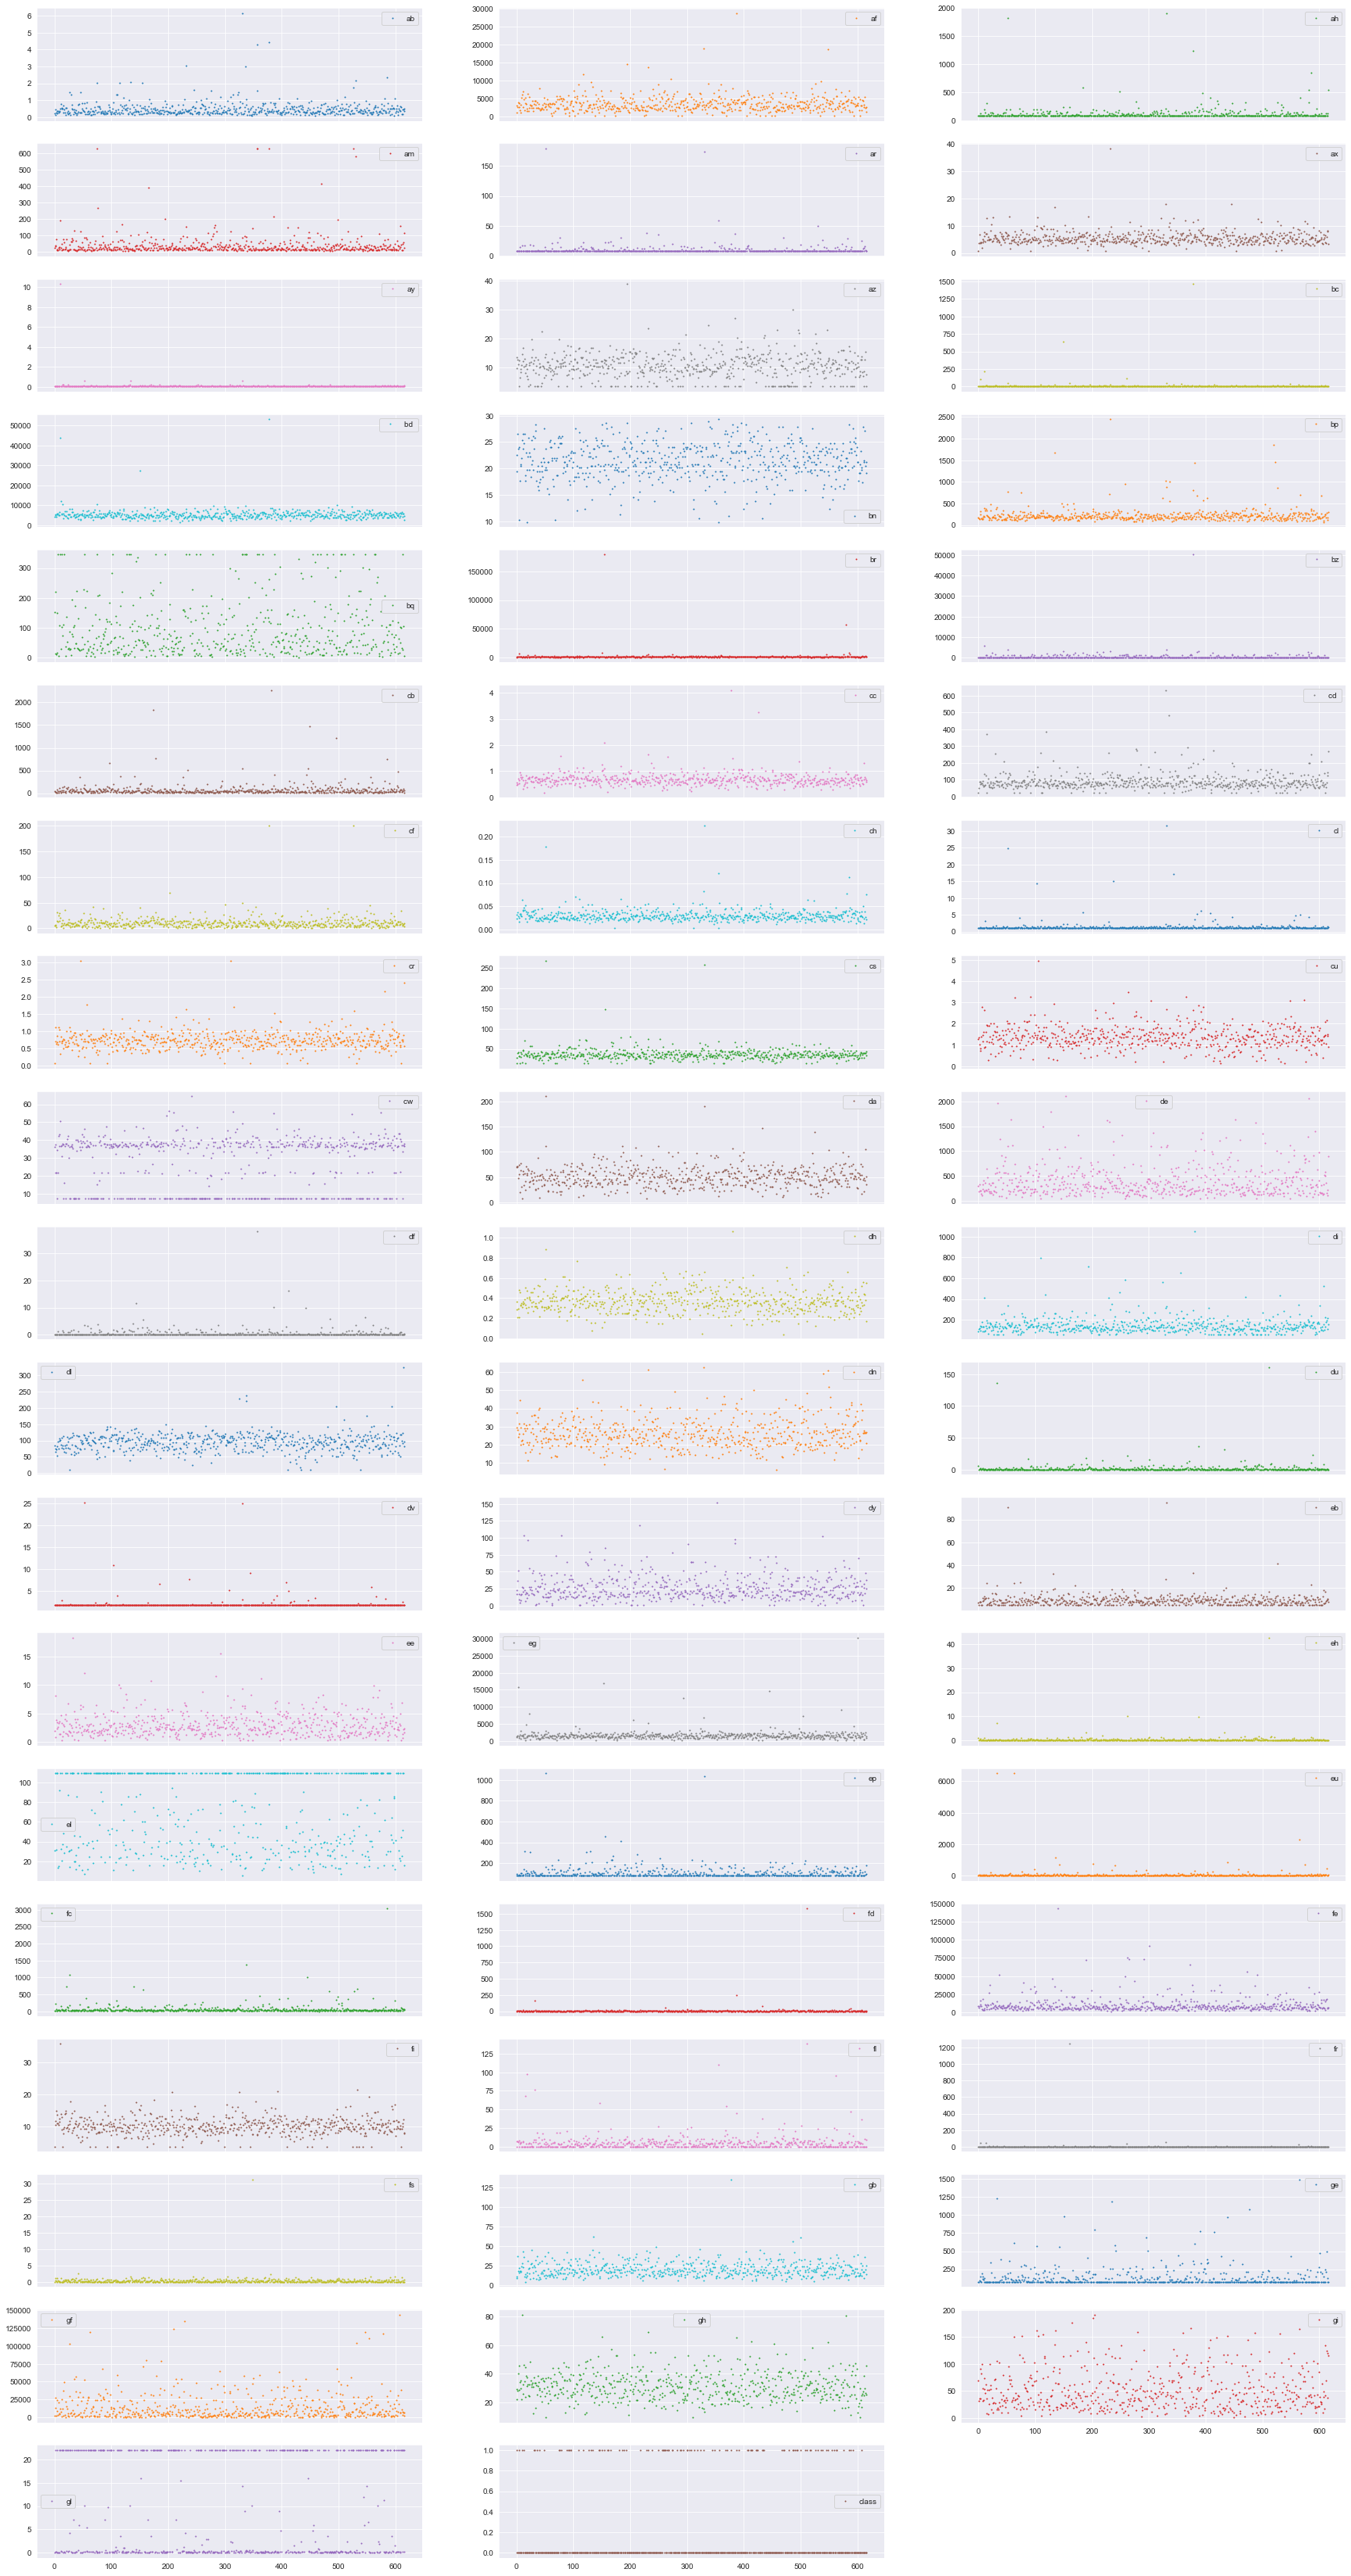

In [92]:
df_train.plot(lw=0, marker='.', subplots=True, layout=(-1,3), figsize=(30, 60), markersize=2)
# Y axis is feature value and X axis is sample index (up to records)

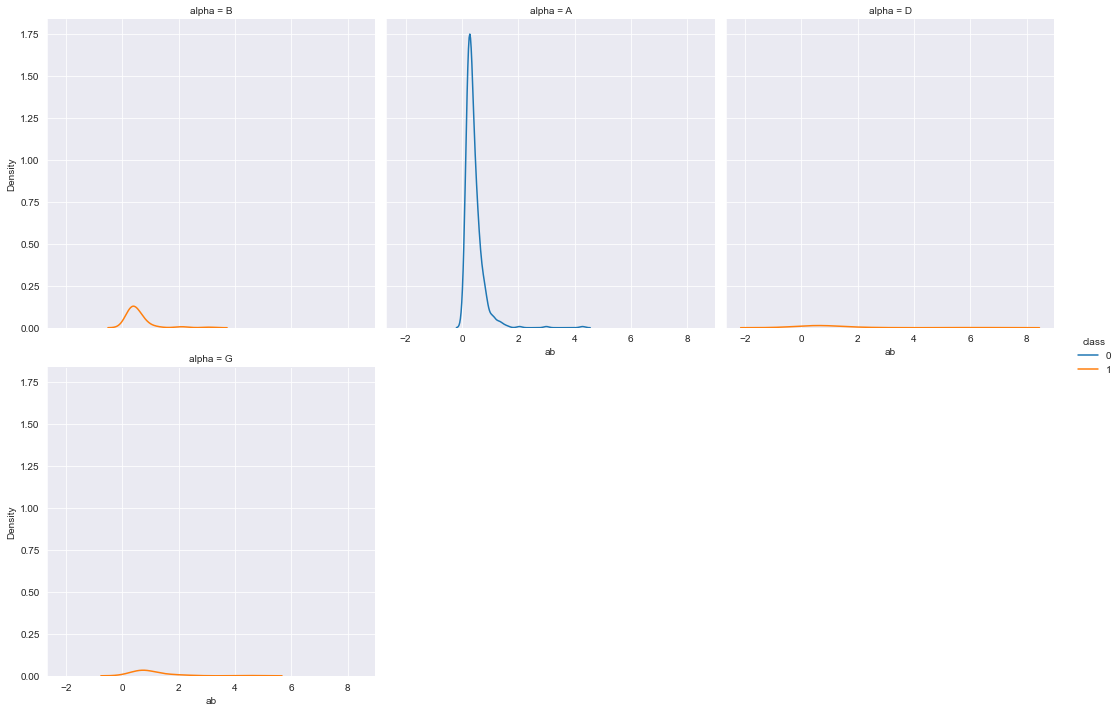

In [73]:
sns.displot(merge_df, x='ab', hue='class', kind='kde', col='alpha', col_wrap=3)

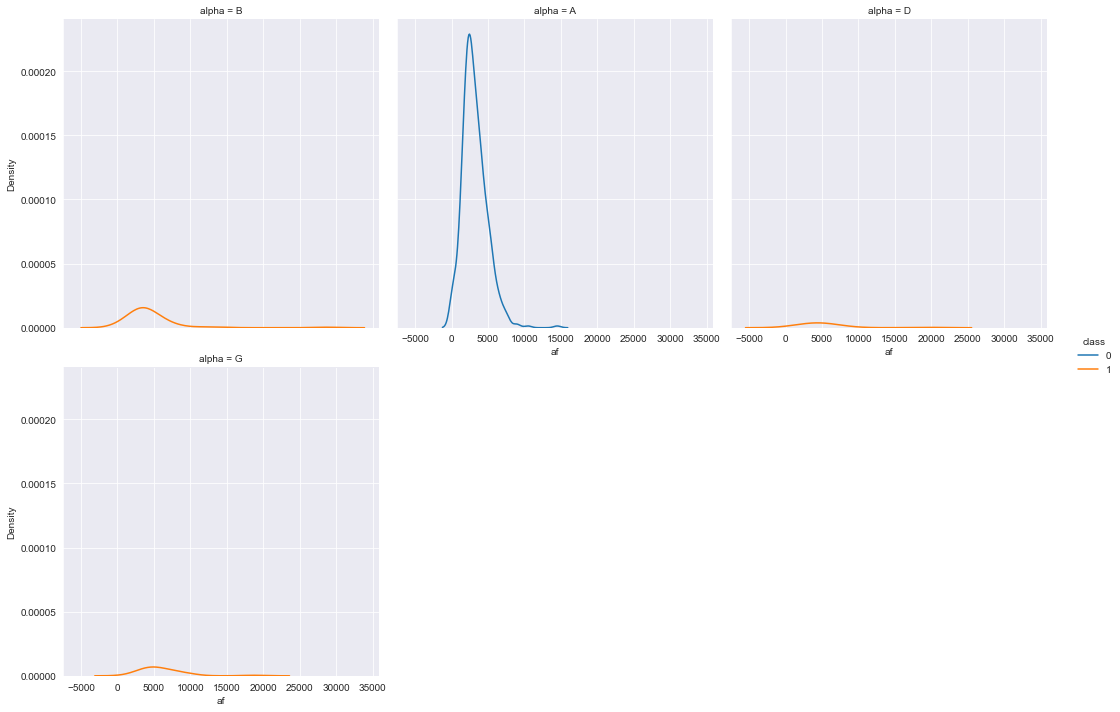

In [75]:
sns.displot(merge_df, x='af', hue='class', kind='kde', col='alpha', col_wrap=3)

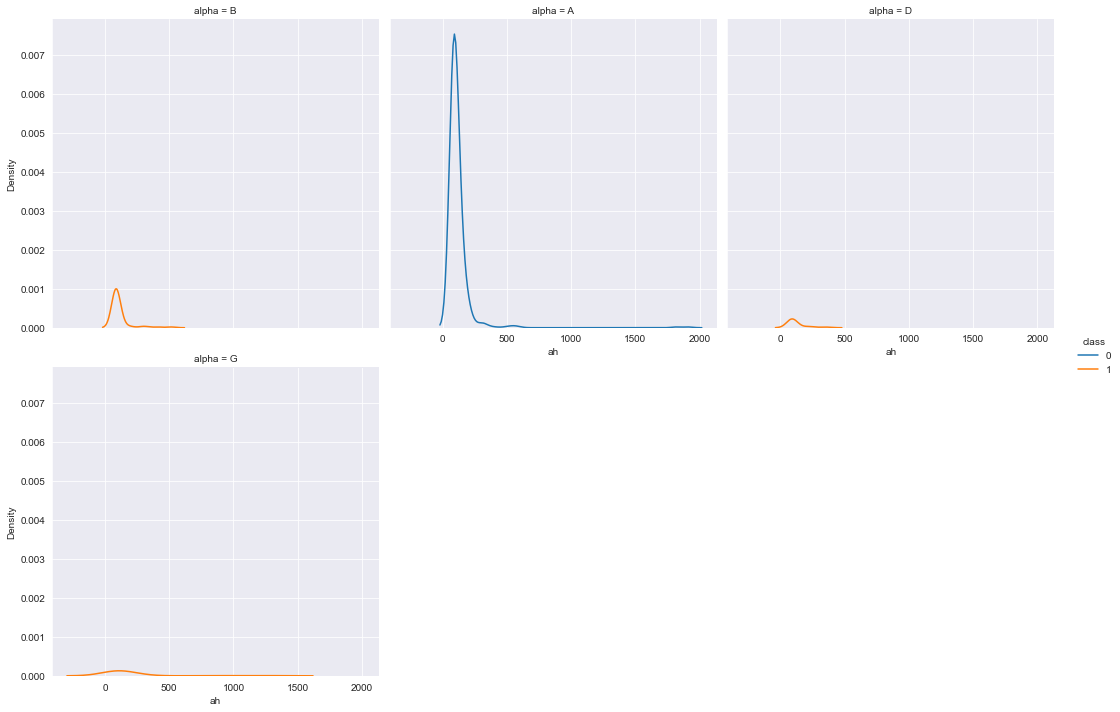

In [76]:
sns.displot(merge_df, x='ah', hue='class', kind='kde', col='alpha', col_wrap=3)

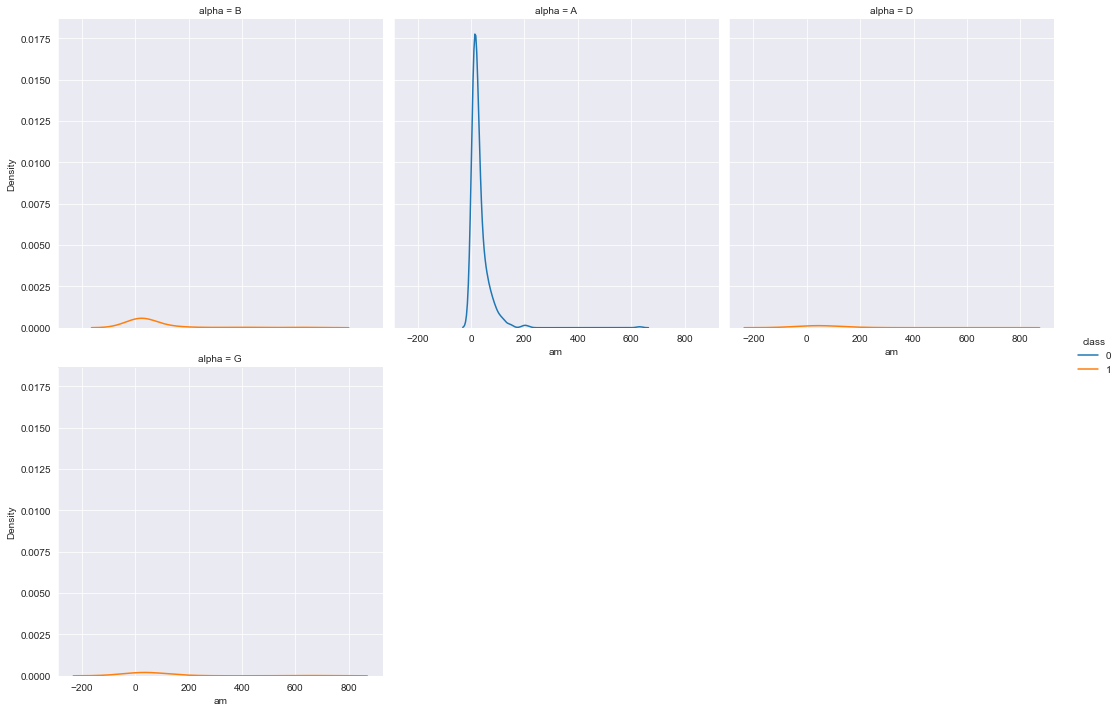

In [77]:
sns.displot(merge_df, x='am', hue='class', kind='kde', col='alpha', col_wrap=3)

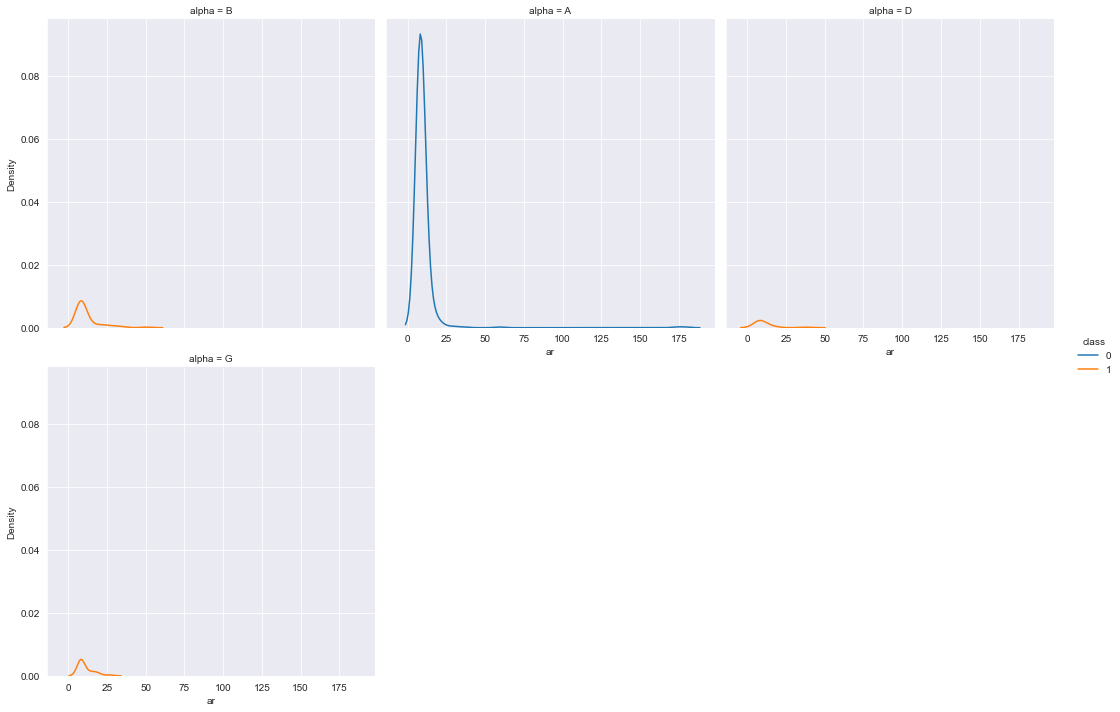

In [78]:
sns.displot(merge_df, x='ar', hue='class', kind='kde', col='alpha', col_wrap=3)

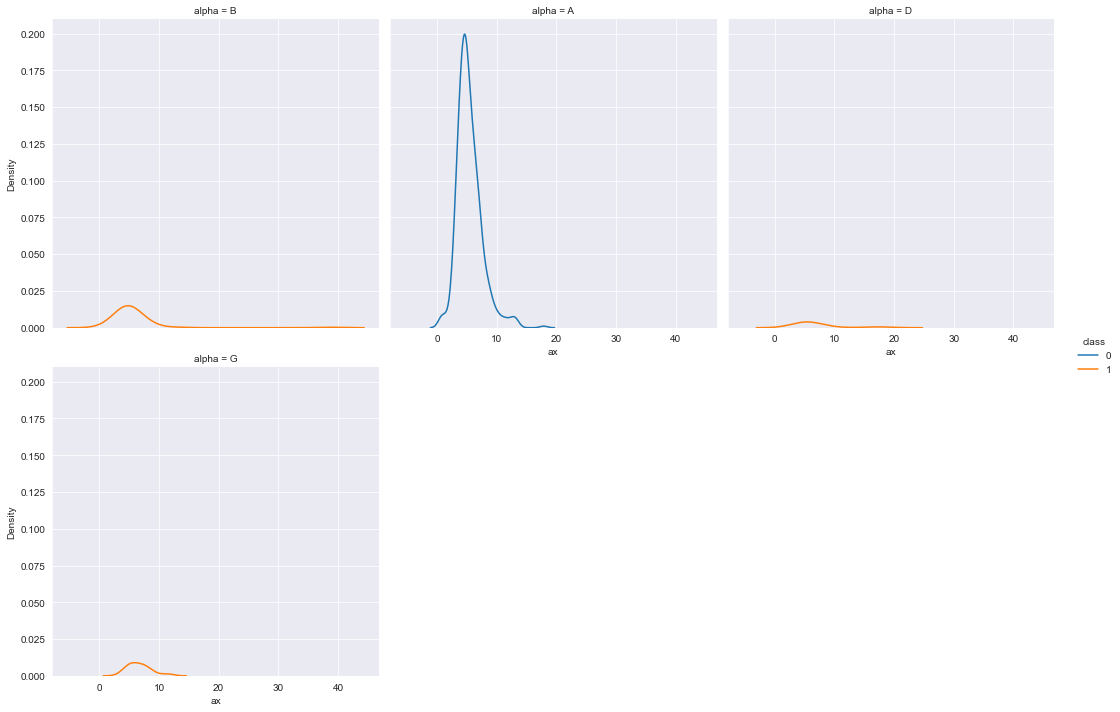

In [79]:
sns.displot(merge_df, x='ax', hue='class', kind='kde', col='alpha', col_wrap=3)

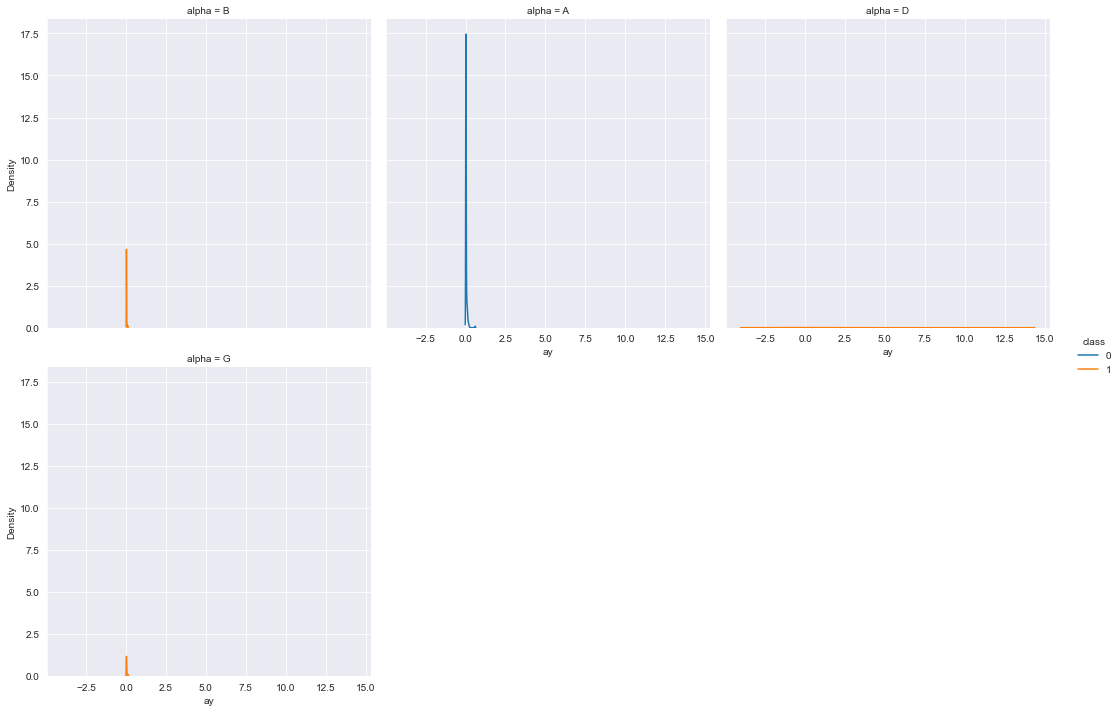

In [80]:
sns.displot(merge_df, x='ay', hue='class', kind='kde', col='alpha', col_wrap=3)

In [ ]:
sns.displot(merge_df, x='ax', hue='class', kind='kde', col='alpha', col_wrap=3)

In [74]:
merge_df.columns

Index(['id', 'ab', 'af', 'ah', 'am', 'ar', 'ax', 'ay', 'az', 'bc', 'bd', 'bn',
       'bp', 'bq', 'br', 'bz', 'cb', 'cc', 'cd', 'cf', 'ch', 'cl', 'cr', 'cs',
       'cu', 'cw', 'da', 'de', 'df', 'dh', 'di', 'dl', 'dn', 'du', 'dv', 'dy',
       'eb', 'ee', 'eg', 'eh', 'ej', 'el', 'ep', 'eu', 'fc', 'fd', 'fe', 'fi',
       'fl', 'fr', 'fs', 'gb', 'ge', 'gf', 'gh', 'gi', 'gl', 'class', 'alpha',
       'beta', 'gamma', 'delta', 'epsilon', 'year_month', 'year', 'month',
       'is_unknow'],
      dtype='object')

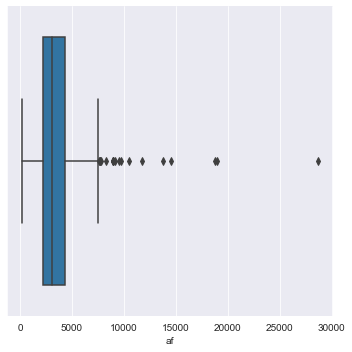

In [65]:
sns.catplot(df_train, x='af', kind='box')

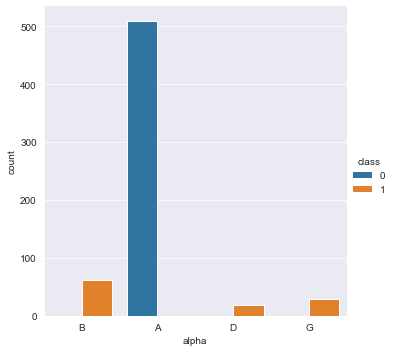

In [11]:
# Make encode column alpha to new feature
# sns.catplot(merge_df, x='alpha', hue='class', col='alpha')
sns.catplot(merge_df, x='alpha', hue='class', kind='count')

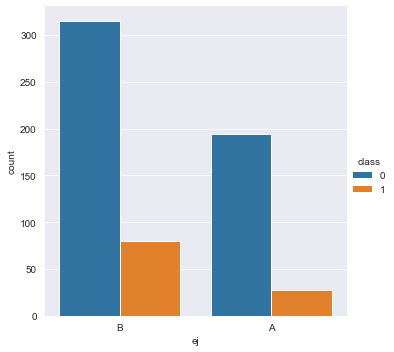

In [12]:
sns.catplot(merge_df, x='ej', hue='class', kind='count')

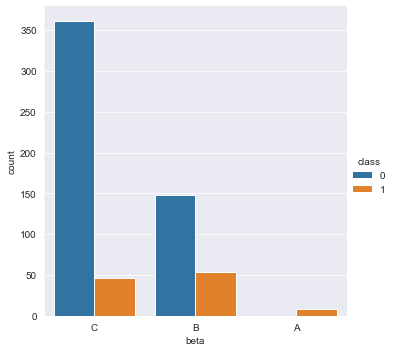

In [19]:
sns.catplot(merge_df, x='beta', hue='class', kind='count')


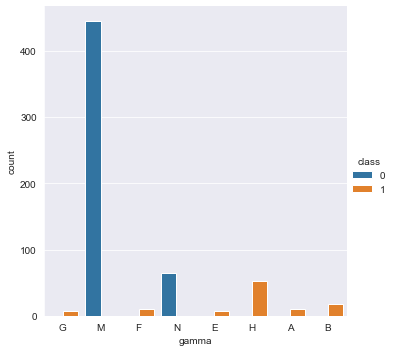

In [21]:
# Interest for feature
sns.catplot(merge_df, x='gamma', hue='class', kind='count')

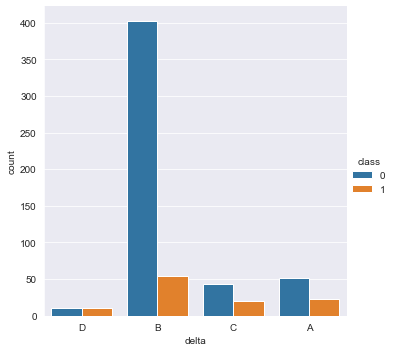

In [22]:
sns.catplot(merge_df, x='delta', hue='class', kind='count')

In [ ]:
['id','ej', 'alpha', 'beta', 'gamma', 'delta', 'epsilon', 'class']

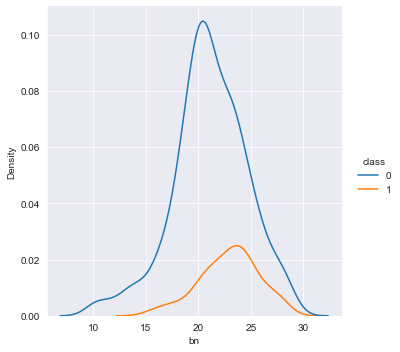

In [17]:
sns.displot(merge_df, x='bn', hue='class', kind='kde')

In [10]:
merge_df.head()

,id,ab,af,ah,am,ar,ax,ay,az,bc,bd,bn,bp,bq,br,bz,cb,cc,cd,cf,ch,cl,cr,cs,cu,cw,da,de,df,dh,di,dl,dn,du,dv,dy,eb,ee,eg,eh,ej,el,ep,eu,fc,fd,fe,fi,fl,fr,fs,gb,ge,gf,gh,gi,gl,class,alpha,beta,gamma,delta,epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [49]:
# Find pattern in each year or month by column epsilon.
# merge_df.epsilon.apply(lambda x: '///' if x != 'Unknown')
merge_df['year_month'] = merge_df.epsilon.apply(lambda x: x.split('/')[2] + '-' + x.split('/')[0] if x != 'Unknown' else '9999')
merge_df['year'] = merge_df.epsilon.apply(lambda x: x.split('/')[2]if x != 'Unknown' else '9999')
merge_df['month'] = merge_df.epsilon.apply(lambda x: x.split('/')[0]if x != 'Unknown' else '9999')

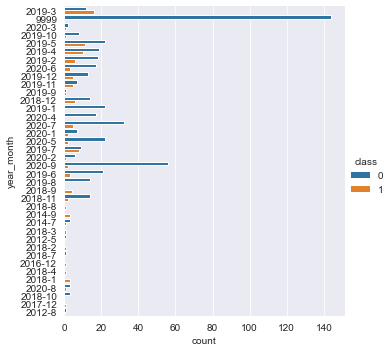

In [46]:
sns.catplot(merge_df, y='year_month', hue='class', kind='count')

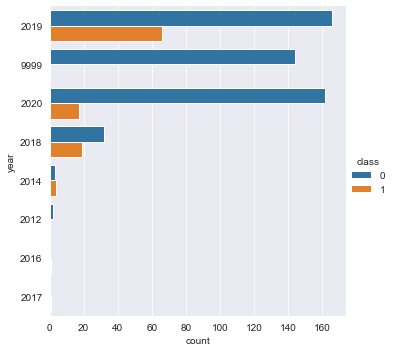

In [47]:
# Unknow interesting for feature
sns.catplot(merge_df, y='year', hue='class', kind='count')

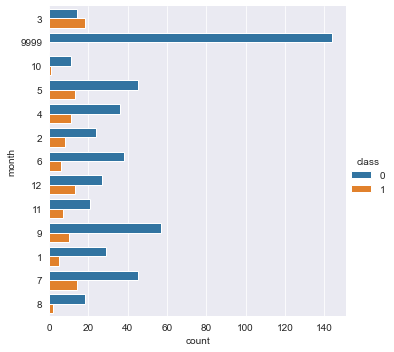

In [50]:
sns.catplot(merge_df, y='month', hue='class', kind='count')

In [57]:
feature_alpha_df = pd.get_dummies(merge_df['alpha'])
feature_alpha_df.columns = 'alpha_'+(feature_alpha_df.columns).str.lower()

In [58]:
feature_alpha_df.head()

,alpha_a,alpha_b,alpha_d,alpha_g
0,False,True,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,False,False,True,False


In [62]:
feature_gamma_df = pd.get_dummies(merge_df['gamma'])
SELECTED_GAMMA = ['A', 'B', 'E', 'H']
feature_gamma_df = feature_gamma_df.loc[:,SELECTED_GAMMA]
feature_gamma_df.columns = 'gamma_'+(feature_gamma_df.columns).str.lower() 

In [65]:
feature_gamma_df.head()

,gamma_a,gamma_b,gamma_e,gamma_h
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [66]:
merge_df['is_unknow'] = merge_df.epsilon.apply(lambda x: True if x == 'Unknown' else False)

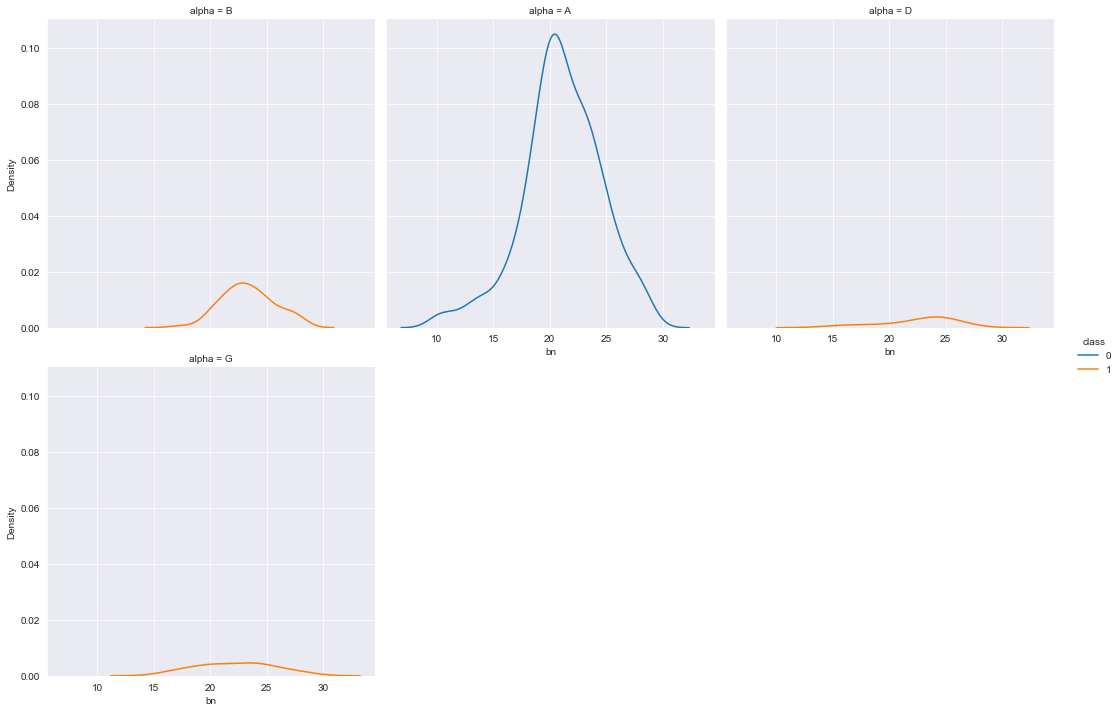

In [72]:
sns.displot(merge_df, x='bn', hue='class', kind='kde', col='alpha', col_wrap=3)

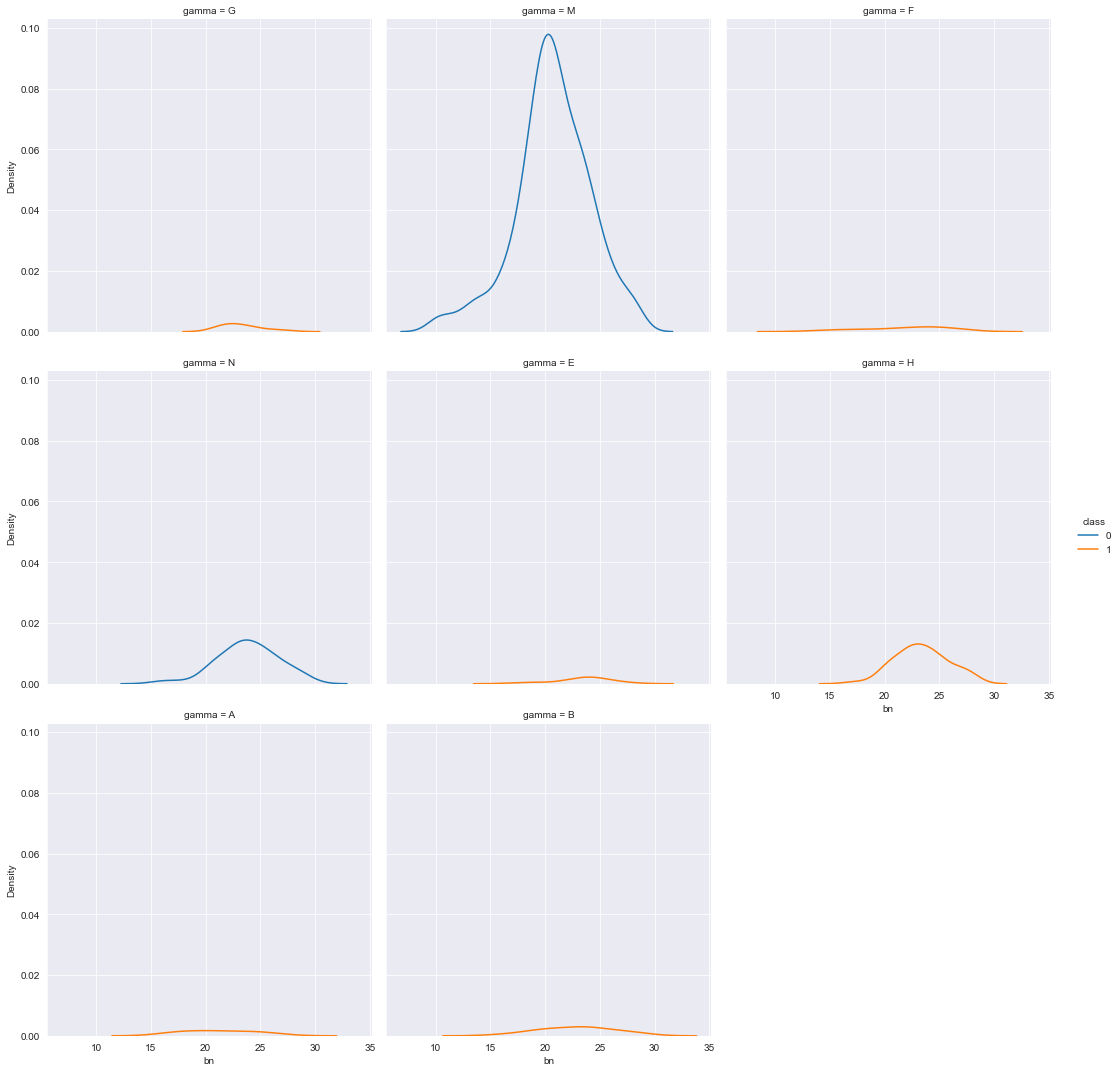

In [71]:
sns.displot(merge_df, x='bn', hue='class', kind='kde', col='gamma', col_wrap=3)

In [ ]:
# We need to clustering and use alpha, gamma, unknown as label?